In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [4]:
xls_file = pd.ExcelFile('Taken Mind Case Study- Kumar Paritosh.xlsx')
xls_file

In [5]:
xls_file.sheet_names

[u'INFO', u'Existing employees', u'Employees who have left', u'Presentation']

In [15]:
Emp_exis = xls_file.parse('Existing employees')
Emp_exis.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [16]:
Emp_left = xls_file.parse('Employees who have left')
Emp_left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [17]:
# I will examine the dataset of the employee who left 

In [21]:
Emp_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
Emp ID                   3571 non-null int64
satisfaction_level       3571 non-null float64
last_evaluation          3571 non-null float64
number_project           3571 non-null int64
average_montly_hours     3571 non-null int64
time_spend_company       3571 non-null int64
Work_accident            3571 non-null int64
promotion_last_5years    3571 non-null int64
dept                     3571 non-null object
salary                   3571 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 279.1+ KB


In [18]:
Emp_left.isnull().any()

Emp ID                   False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
dtype: bool

In [20]:
Emp_left = xls_file.parse('Employees who have left')
Emp_left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [31]:
# I will rename it for my convinience for further steps
Emp_left = Emp_left.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'dept' : 'department'
                        })
Emp_left.head()

,Emp ID,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [32]:
#As these are the employees who left , I will see add a column 'turnover' that they have left the company

In [33]:
Emp_left['turnover']=1

In [34]:
Emp_left.head()

,Emp ID,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary,turnover
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


In [36]:
front = Emp_left['turnover']
Emp_left.drop(labels=['turnover'], axis=1,inplace = True)
Emp_left.insert(0, 'turnover', front)
Emp_left.head()

,turnover,Emp ID,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,1,3,0.11,0.88,7,272,4,0,0,sales,medium
3,1,4,0.72,0.87,5,223,5,0,0,sales,low
4,1,5,0.37,0.52,2,159,3,0,0,sales,low


In [40]:
Emp_exis.count()

Emp ID                   11428
satisfaction_level       11428
last_evaluation          11428
number_project           11428
average_montly_hours     11428
time_spend_company       11428
Work_accident            11428
promotion_last_5years    11428
dept                     11428
salary                   11428
dtype: int64

In [41]:
Emp_left.count()

turnover               3571
Emp ID                 3571
satisfaction           3571
evaluation             3571
projectCount           3571
averageMonthlyHours    3571
yearsAtCompany         3571
workAccident           3571
promotion              3571
department             3571
salary                 3571
dtype: int64

In [52]:
from __future__ import division
percentage=(3571/11428)*100
percentage

31.247812390619533

In [62]:
print("Hence the percentage of employees who left the company are : " , percentage)

('Hence the percentage of employees who left the company are : ', 31.247812390619533)


In [64]:
Emp_left.dtypes

turnover                 int64
Emp ID                   int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [65]:
Emp_left.shape

(3571, 11)

In [67]:
turnover_rate = Emp_left.turnover.value_counts() / len(Emp_exis)
turnover_rate

1    0.312478
Name: turnover, dtype: float64

In [68]:
Emp_left.describe()

,turnover,Emp ID,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,3571.0,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,1.0,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,0.0,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,1.0,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,1.0,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,1.0,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,1.0,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,1.0,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


In [70]:
# Overview of summary (left V.S. Existing)
turnover_Summary = Emp_left.groupby('turnover')
turnover_Summary.mean()

,Emp ID,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,,
1,6500.439653,0.440098,0.718113,3.855503,207.41921,3.876505,0.047326,0.005321


,turnover,Emp ID,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emp ID,NaN,1.000000,0.000791,-0.016324,-0.013354,-0.009820,-0.001109,-0.024144,0.016686
satisfaction,NaN,0.000791,1.000000,0.182295,-0.227113,-0.084117,0.446440,0.005864,0.005516
evaluation,NaN,-0.016324,0.182295,1.000000,0.804155,0.830336,0.783873,-0.001875,-0.047992
projectCount,NaN,-0.013354,-0.227113,0.804155,1.000000,0.875194,0.601989,-0.008401,-0.032301
averageMonthlyHours,NaN,-0.009820,-0.084117,0.830336,0.875194,1.000000,0.664011,-0.009048,-0.035475
yearsAtCompany,NaN,-0.001109,0.446440,0.783873,0.601989,0.664011,1.000000,0.005222,-0.045888
workAccident,NaN,-0.024144,0.005864,-0.001875,-0.008401,-0.009048,0.005222,1.000000,0.056214
promotion,NaN,0.016686,0.005516,-0.047992,-0.032301,-0.035475,-0.045888,0.056214,1.000000


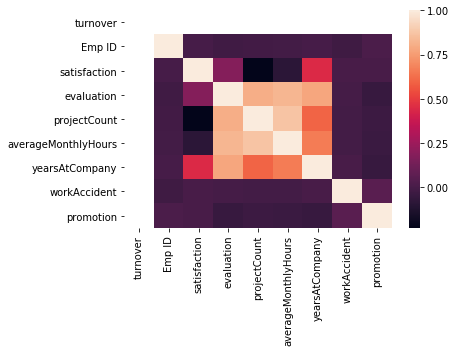

In [71]:
#Correlation Matrix
corr = Emp_left.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

#### Space for Mapping 

In [86]:
emp_population = Emp_exis['satisfaction_level'].mean()
emp_turnover_satisfaction = Emp_left['satisfaction'].mean()

print( 'The mean satisfaction for the employee population is: ' + str(emp_population))
print( 'The mean satisfaction for employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean satisfaction for the employee population is: 0.66680959048
The mean satisfaction for employees that had a turnover is: 0.440098011761


In [90]:
import scipy.stats as stats
stats.ttest_1samp(a = Emp_left['satisfaction'], # Sample of Employee satisfaction who left
                  popmean = emp_population)  # Employee Who stayed

Ttest_1sampResult(statistic=-51.330348675474312, pvalue=0.0)

In [91]:
degree_freedom = len(Emp_left)

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285216
The t-distribution right quartile range is: 1.9606285216


Text(0,0.5,u'Employee Count')

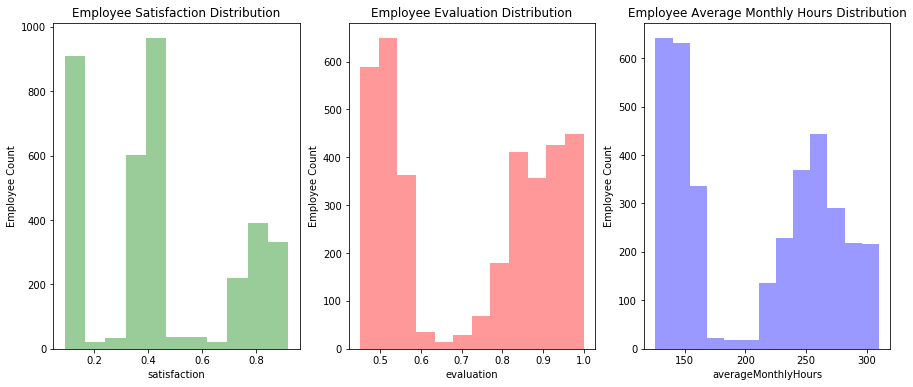

In [92]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(Emp_left.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(Emp_left.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(Emp_left.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
k=Emp_exis
p=Emp_leftaxes[2].set_ylabel('Employee Count')

In [253]:
k=Emp_exis
p=Emp_left

k = k.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'dept' : 'department'
                        })
k['turnover']=0
#f = k['turnover']
#k.drop(labels=['turnover'], axis=1,inplace = True)
#k.insert(0, 'turnover', front)
k.head()

fulldata=p.combine_first(k)
fulldata.shape

(11428, 11)

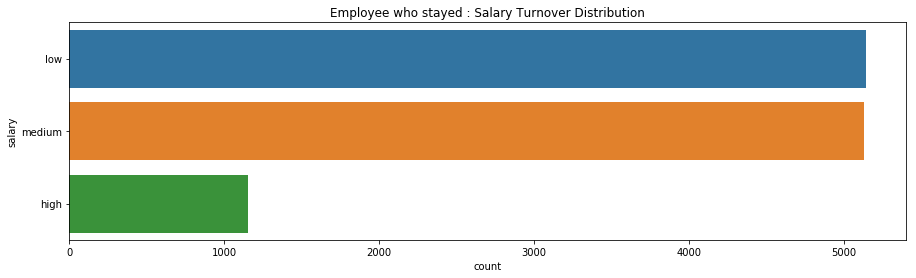

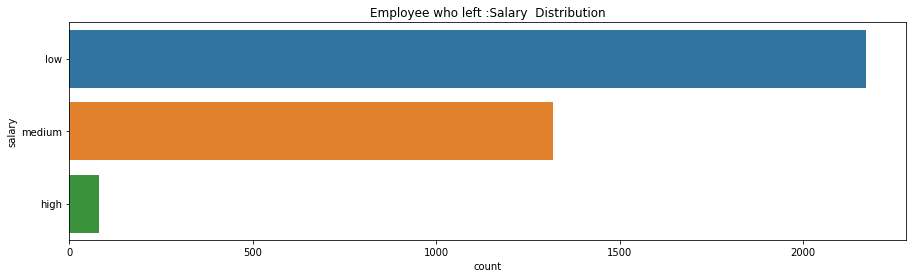

In [119]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary",  data=Emp_exis).set_title('Employee who stayed : Salary Turnover Distribution');

f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary",  data=Emp_left).set_title('Employee who left :Salary  Distribution');

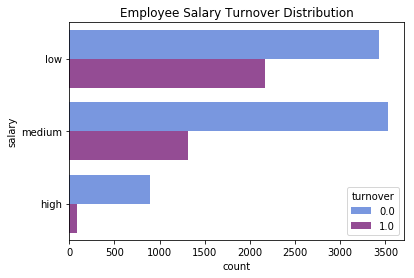

In [255]:
#Now more :
color=['#6890F0','#A040A0']
sns.countplot(y="salary", hue='turnover',palette=color, data=fulldata).set_title('Employee Salary Turnover Distribution');

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

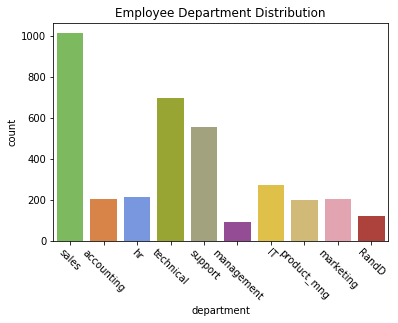

In [127]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot 
sns.countplot(x='department', data=Emp_left, palette=color_types).set_title('Employee Department Distribution');

plt.xticks(rotation=-45)

(array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.]),
 <a list of 7 Text xticklabel objects>)

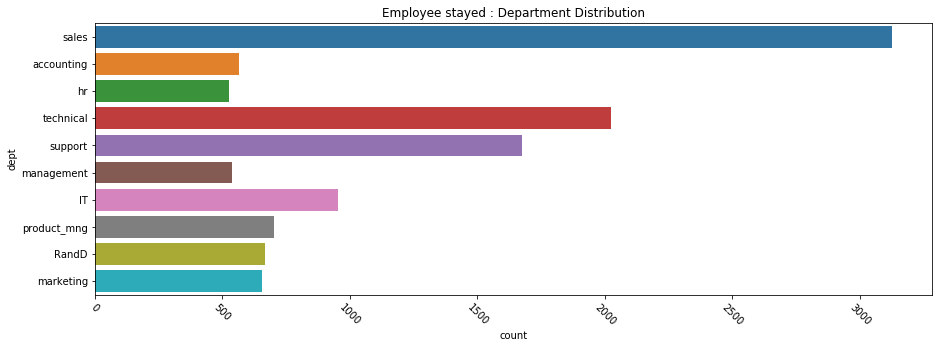

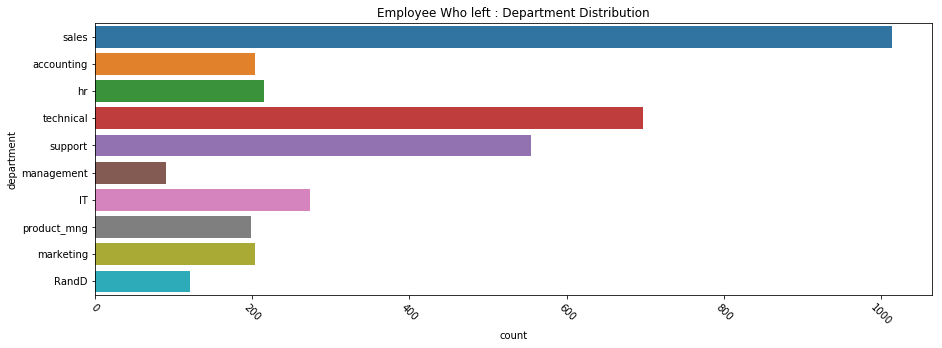

In [125]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="dept",  data=Emp_exis).set_title('Employee stayed : Department Distribution');
plt.xticks(rotation=-45)

f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department",  data=Emp_left).set_title('Employee Who left : Department Distribution');
plt.xticks(rotation=-45)

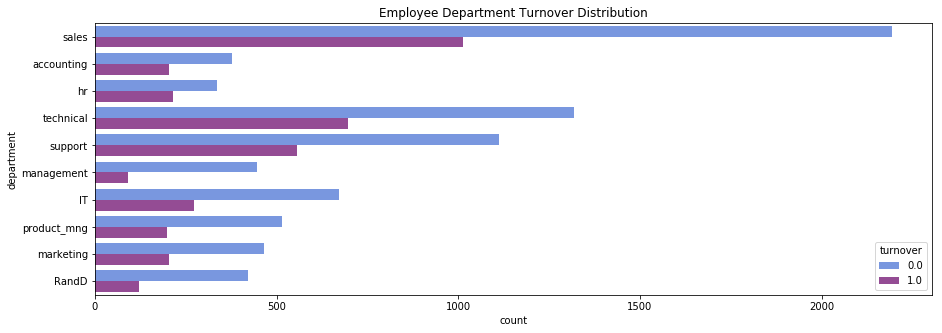

In [257]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover',palette=color, data=fulldata).set_title('Employee Department Turnover Distribution');

Employees who stayed


[Text(0,0.5,u'Percent')]

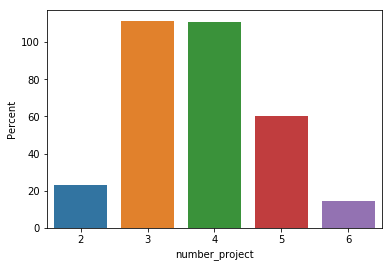

In [142]:
print("Employees who stayed")
ax = sns.barplot(x="number_project", y="number_project", data=Emp_exis, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Employees who Left


[Text(0,0.5,u'Percent')]

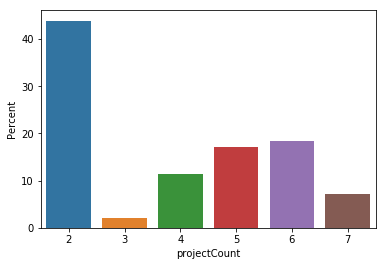

In [143]:
print("Employees who Left")
ax = sns.barplot(x="projectCount", y="projectCount", data=Emp_left, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

[Text(0,0.5,u'Percent')]

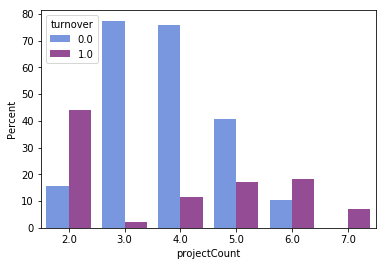

In [258]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover",palette=color, data=fulldata, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Text(0.5,1,u'Employee Evaluation Distribution - Turnover V.S. No Turnover')

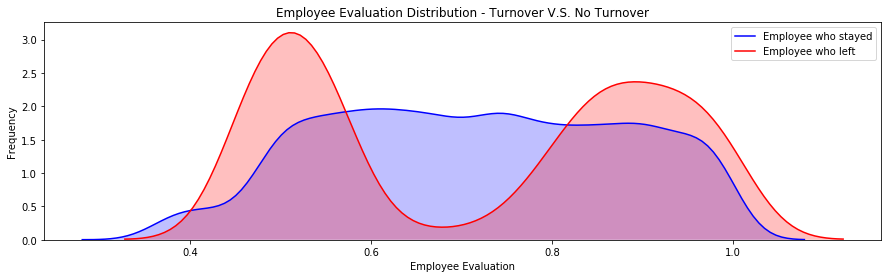

In [157]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(Emp_exis['last_evaluation'] , color='b',shade=True,label='Employee who stayed')
ax=sns.kdeplot(Emp_left['evaluation'] ,color='r',shade=True, label='Employee who left')
#x=sns.kdeplot(Emp_left)
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

Text(0.5,1,u'Employees Who Stayed')

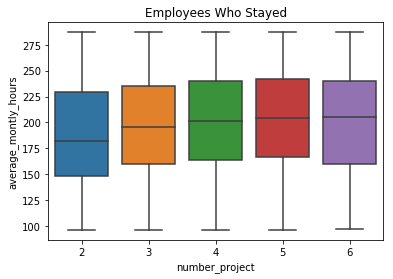

In [170]:
sns.boxplot(x="number_project", y="average_montly_hours",  data=Emp_exis).set_title("Employees Who Stayed")

Text(0.5,1,u'Employees Who Left')

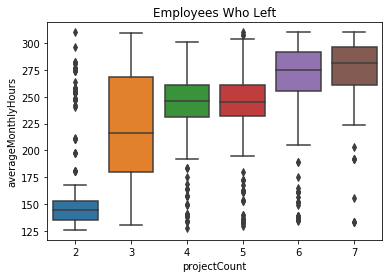

In [177]:
sns.boxplot(x="projectCount", y="averageMonthlyHours",  data=Emp_left).set_title("Employees Who Left")

Text(0.5,1,u'Combine Plot')

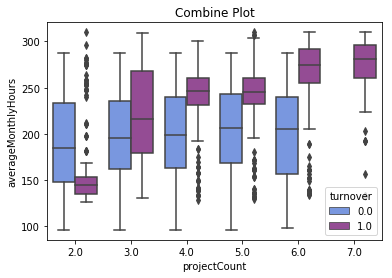

In [259]:

sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", palette=color,data=fulldata).set_title("Combine Plot")

In [179]:
k=Emp_exis
p=Emp_left

In [186]:
k = k.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'dept' : 'department'
                        })
k['turnover']=0
#f = k['turnover']
#k.drop(labels=['turnover'], axis=1,inplace = True)
#k.insert(0, 'turnover', front)
k.head()

,turnover,Emp ID,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,0,2002,0.82,0.67,2,202,3,0,0,sales,low
2,0,2003,0.45,0.69,5,193,3,0,0,sales,low
3,0,2004,0.78,0.82,5,247,3,0,0,sales,low
4,0,2005,0.49,0.60,3,214,2,0,0,sales,low


In [203]:
fulldata=p.combine_first(k)
fulldata.head()

,turnover,Emp ID,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1.0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,1.0,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,1.0,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,1.0,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,1.0,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


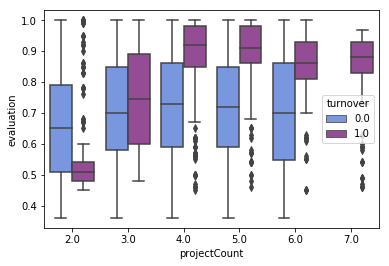

In [204]:
color=['#6890F0','#A040A0']
sns.boxplot(x="projectCount", y="evaluation", palette=color,hue="turnover", data=fulldata)

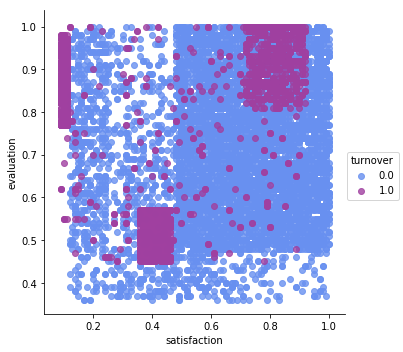

In [205]:
sns.lmplot(x='satisfaction', y='evaluation', data=fulldata,
           fit_reg=False, # regression line
           hue='turnover',palette=color)

[Text(0,0.5,u'Percent')]

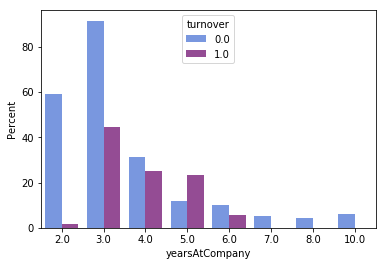

In [207]:
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=fulldata,palette=color, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

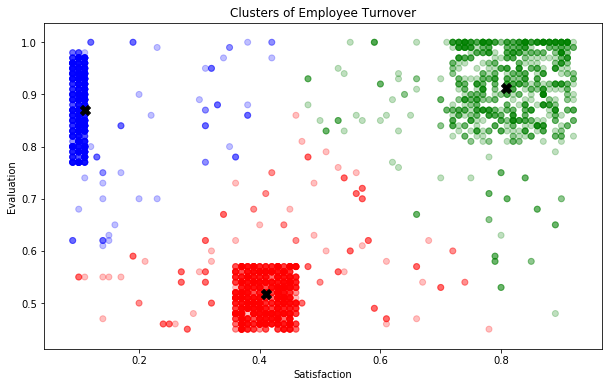

In [210]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(fulldata[fulldata.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=fulldata[fulldata.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()